# From Classroom to Career: Evaluating UC CS Curriculum and Job Readiness

## Permissions

* [X] YES - make available
* [  ] NO - keep private

- Peter Shamoun
- Viki Shi
- Emily Cai
- Jae Kim

## Abstract

We conducted this study to evaluate how well UC San Diego’s computer science curriculum prepares students for industry needs compared to other UC campuses. Using web scraping, we collected course descriptions from all UCs and structured them into dataframes. We then analyzed these curricula against industry-preferred skills using data from the Stack Overflow Developer Survey (2021-2024), which included responses from 65,000-80,000 developers annually. By aggregating and visualizing the data, we assessed the alignment between academic training and real-world job market requirements.

Our findings indicate a significant gap between the programming languages and technologies emphasized in UC curricula and those most commonly used in the industry. While UC programs focus on Python, Java, and Matlab, industry professionals primarily use JavaScript, HTML/CSS, SQL, and frameworks like React and Node.js. Additionally, we observed that universities with more funding or prestige tend to have stronger curricular alignment with industry demands. Among UCs, UC San Diego ranked highest in industry-relevant skills, though it still lacked coverage of key modern tools.

Overall, while UCs provide strong theoretical foundations, they do not fully prepare students for industry expectations in practical software development. Integrating more hands-on training with widely used programming languages, databases, and frameworks would better equip students for the workforce. Our findings highlight the need for continuous curriculum updates and stronger collaboration between universities and industry professionals to bridge this gap.



# Research Question

How well does the UC San Diego computer science curriculum prepare students skill-wise for industry needs in comparison to the other UCs based on the skills reported by developers in industry surveys in the past 5 years?



## Background and Prior Work


## Introduction

Computer science programs are designed to prepare students for successful careers in technology. However, industry technologies and required skills evolve rapidly—often outpacing curriculum updates—resulting in graduates who may lack the hands-on, current technical competencies demanded by employers. With a challenging tech job market and increasingly scarce new-graduate roles, concerns have grown that undergraduate programs, including the UC San Diego computer science program and the broader University of California curriculum, are not adequately preparing students for today's industry needs.

This study evaluates the alignment between the UCSD and overall UC computer science curricula and the skills required in the tech industry. The analysis focuses on:
- **Curriculum Content:** Reviewing course descriptions and curriculum goals.
- **Industry Data:** Analyzing insights from recent Stack Overflow developer surveys and comparing them with current job market requirements.

**Research Objectives and Measurement:**
- **Intended Relationship:** The study seeks to determine the correlation between the curriculum’s technical content and the skills demanded by the tech industry. In particular, it examines whether courses covering emerging technologies like cloud computing, DevOps, containerization with Kubernetes and Docker adequately match the expertise employers seek.
- **Measurement Metrics:** 
  - Quantifying the percentage of courses at UCSD and other UC campuses that include training in in-demand technologies.
  - Comparing the success rate of UCSD graduates in securing tech roles with that of their peers from other UC institutions.
  - Evaluating the representation of practical skills in the curriculum against their frequency in industry job postings.
  - Using survey data to assess graduates’ proficiency in applied skills versus the theoretical emphasis in academic programs.

Prior studies have underscored significant gaps between academic preparation and industry requirements. For example:
- **[Closing the Gap between Software Engineering Education and Industrial Needs (Garousi et al., 2018)](https://arxiv.org/pdf/1812.01954)**  
  This review of 33 studies from 12 countries found that graduates often lack hands-on skills in cloud computing, DevOps, and modern software development practices. It concluded that while universities emphasize theoretical knowledge, employers prioritize applied and soft skills, such as teamwork and communication.
- **[The Gap between Higher Education and the Software Industry – A Case Study on Technology Differences (Dobslaw et al., 2023)](https://arxiv.org/pdf/2303.15597)**  
  This study highlighted a growing disparity between the academic courses that aspiring software engineers take and the practical work they perform on the job. It emphasized the lack of courses on cloud computing and related technologies, suggesting that universities update their curricula more frequently to remain relevant to industry demands.


# Hypothesis


UCSD is ranked third by US News and World Report among UC schools for computer science, so we expect that its curriculum is comparable, if not stronger than other UCs. We predict that UCSD's computer science curriculum prepares students as well as other UCs for industry needs, given its strong ranking. If significant gaps exist, they may be systemic across UC programs rather than specific to UCSD. However, if UCSD shows stronger alignment with industry standards, this may indicate that higher-ranked CS programs provide better preparation from academia to the workforce

# Data

## Data overview
For our analysis, we used data from both UC computer science curricula and a publically avaliable Stack Overflow Developer Survey. Our objective was to combine all UC curricula into a single dataframe and compare them with industry-relevant skills derived from the Stack Overflow dataset to view the universities alignment with industry demands.

### Gathering Data 
To begin, we webscraped CS classes from the 9 undergrad UCs, collecting course IDs, titles, descriptions, whether they were upper or lower div (boolean), and used a python package to extract keywords. Each individual UC dataset contained between 49 and 100 rows, which were then concatenated to form a comprehensive UC curriculum dataset.

**Dataset #1: UC Curriculum**  
- **Number of Observations**: 587 
- **Variables**:  
  - `University` (str): Name of the university.  
  - `Course ID` (str): Course identifier, typically in the format "STR ###".  
  - `Course Title` (str): Official course title.  
  - `Upper Div` (bool): Indicates whether the course is upper or lower division.  
  - `Skills` (list): Extracted keywords representing primary skills taught in the course.  

The second dataset was obtained from the publicly available Stack Overflow Developer Survey, spanning the years 2021-2024 to ensure relevance to current industry trends.  

**Dataset #2: Stack Overflow Developer Survey**  
- **Number of Observations**: 152,962  
- **Public Dataset Link**: [Stack Overflow Survey](https://survey.stackoverflow.co/)  
- **Variables**:  
  - `LanguageHaveWorkedWith` (str): Programming languages used by respondents.  
  - `DatabaseHaveWorkedWith` (str): Databases utilized by respondents.  
  - `PlatformHaveWorkedWith` (str): Platforms employed in development.  
  - `WebframeHaveWorkedWith` (str): Web frameworks used.  
  - `ToolsTechHaveWorkedWith` (str): Software tools and technologies utilized.  
  - `MiscTechHaveWorkedWith` (str): Additional technologies.  
  - `EmbeddedHaveWorkedWith` (str): Embedded systems experience.  
  - `ProfessionalTech` (str): Other professional technologies used.  
  - `EdLevel` (str): Education level of respondents.  
  - `DevType` (str): Job role classifications.  
  - `Country` (str): Respondent’s country of employment.  

These variables were selected to maximize the effectiveness of our analysis. By comparing skills covered in UC curricula with those most commonly used in the industry, we could assess the alignment between academic training and job market requirements. Additionally, filtering the Stack Overflow dataset by education level and country allowed us to refine our analysis to focus specifically on university graduates working in the United States.  


## Data Gathering and Cleaning 
### Importing Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import time

from bs4 import BeautifulSoup
from tqdm import tqdm
from keybert import KeyBERT
from IPython.display import display
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager


## Webscraping all individual UCs

**UC Berkeley**  

In [ ]:
tqdm.pandas()

berk = "https://guide.berkeley.edu/courses/compsci/"
berk_req = requests.get(berk)
soup = BeautifulSoup(berk_req.text, "html.parser")

divs = soup.find_all("div", class_="courseblock")


class_id = []
class_title = []
desc = []
upper = []

for div in divs:
    heading = div.find("p", class_="course-heading")

    if heading:
        course_code = div.find("span", class_="code")
        course_title = div.find("span", class_="title")
        course_desc = div.find(class_="courseblockdesc")

        course_details = div.find_all("p")
        is_undergrad = any("Undergraduate" in p.text for p in course_details)

        if is_undergrad:  
            course_id_text = course_code.text.strip()
            class_id.append(course_id_text)
            class_title.append(course_title.text.strip())
            desc.append(course_desc.text.split('\n')[1])

           
            course_number = int("".join(filter(str.isdigit, course_id_text)))  # Extract numeric part
            is_upper = course_number >= 100
            upper.append(is_upper)  


df = pd.DataFrame({
    "Course ID": class_id,
    "Course Title": class_title,
    "Course Description": desc,
    "Upper Div": upper  
})


def keyword_wrapper(doc):
    kw_model = KeyBERT()
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"]  # Stop words
    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)]  # Extract top 10 keywords


df['Skills'] = df['Course Description'].progress_apply(keyword_wrapper)

df.head()
df.to_csv("UC_Berkeley.csv")


100%|██████████| 48/48 [01:09<00:00,  1.44s/it]


,Course ID,Course Title,Course Description,Upper Div,Skills
0,COMPSCI C8,Foundations of Data Science,Foundations of data science from three perspec...,False,"[data, datasets, privacy, computational, stati..."
1,COMPSCI 10,The Beauty and Joy of Computing,An introductory course for students with minim...,False,"[programming, computing, python, program, algo..."
2,COMPSCI W10,The Beauty and Joy of Computing,This course meets the programming prerequisite...,False,"[programming, computing, students, application..."
3,COMPSCI 36,CS Scholars Seminar: The Educational Climate i...,Computer Science 36 is a seminar for CS Schola...,False,"[cs36, cs61a, academia, programs, curriculum, ..."
4,COMPSCI 39,Freshman/Sophomore Seminar,Freshman and sophomore seminars offer lower di...,False,"[seminars, seminar, semester, students, campus..."


**UC Merced**  

In [ ]:
UCM_home_url = "https://catalog.ucmerced.edu/content.php?filter%5B27%5D=CSE&filter%5B29%5D=&filter%5Bkeyword%5D=&filter%5B32%5D=1&filter%5Bcpage%5D=1&cur_cat_oid=23&expand=&navoid=2517&search_database=Filter#acalog_template_course_filter"

response = requests.get(UCM_home_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    links = [soup.find_all("td", class_="width")[i].find_all('a')[0] for i in range(len(soup.find_all("td", class_="width")))]
    coids = [links[i]['href'][-5:] for i in range(len(links))]
    full_links = [f'https://catalog.ucmerced.edu/preview_course_nopop.php?catoid=23&coid={course}' for course in coids]
else:
    print('Request failed:', response.status_code)

data = []
for url in full_links:
    resposne = requests.get(url)
    if response.status_code == 200:

        driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

        driver.get(url)

        time.sleep(1)

        rendered_html = driver.page_source
        
        driver.quit()

        soup = BeautifulSoup(rendered_html, "html.parser")

        soup = soup.find('td', class_ = 'block_content')

        header = soup.find("h1", id="course_preview_title")

        header_text = header.get_text(strip=True)
        course_code, course_title = [part.strip() for part in header_text.split(":", 1)]

        course_description = ""
        for br in soup.find_all("br"):
            next_text = br.next_sibling
            if next_text and isinstance(next_text, str):
                cleaned = next_text.strip()
                if cleaned and "Unit" not in cleaned:
                    course_description = cleaned
                    break

        result = [course_code, course_title, course_description]
        data.append(result)

    
    else:
        print('Request failed:', response.status_code)

df = pd.DataFrame(columns = ['Course ID', 'Course Title', 'Description'], data=data)

df['Upper Div'] = df['Course ID'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
    "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors",
    "approach", "aspects", "awarded",
    "concepts", "course", "courses", "credit", "design", "fields",
    "foundation", "fundamental", "fundamentals", "introduction", "issues", "level",
    "lower", "major", "methods", "none", "overview", "perspectives",
    "practice", "practices", "principles", "process", "processes",
    "programs", "related", "required", "requirement", "role",
    "skills", "study", "techniques", "tools", "topics", "understanding",
    "upper", "various", "work"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
end = time.time()
print('Time:', end - start) #print time

df= df[['Course ID',	'Course Title',	'Upper Div',	'keywords']]
df.columns = ['Course ID', 'Course Title', 'Upper Div', 'Skills']

df.head()
df.to_csv("UC_Merced.csv")

100%|██████████| 43/43 [01:16<00:00,  1.79s/it]

Time: 76.88936018943787


,Course ID,Course Title,Upper Div,Skills
0,CSE 005,Introduction to Computer Applications,False,"[programming, computers, data, security, infor..."
1,CSE 015,Discrete Mathematics,False,"[mathematics, discrete, disciplines, basic, gr..."
2,CSE 019,Introduction to Computing,False,"[programming, basics, arrays, variables, stude..."
3,CSE 022,Introduction to Programming,False,"[programming, python, students, teaching, comp..."
4,CSE 024,Advanced Programming,False,"[programming, pointers, basic, students, langu..."


**UC Davis** 


In [ ]:
ucd_url = "https://catalog.ucdavis.edu/courses-subject-code/ecs/"
req = requests.get(ucd_url)
soup = BeautifulSoup(req.text)

divs = soup.find_all("div", class_="courseblock")

class_id = []
class_title = []
desc = []


for div in divs:
    code_element = div.find("span", class_="text courseblockdetail detail-code margin--span text--semibold text--big")
    title_element = div.find("span", class_="text courseblockdetail detail-title margin--span text--semibold text--big")
    desc_element = div.find("p", class_= "courseblockextra noindent")

    class_id.append(code_element.text.strip())
    class_title.append(title_element.text.strip().replace('—', ""))
    desc.append(desc_element.text.split("Course Description:")[1])

df = pd.DataFrame({"Course ID": class_id, "Course Title": class_title, "Course Description":desc})

df["Upper Div"] = df["Course ID"].str.extract(r'(\d+)')[0].astype(int).apply(lambda x:x>=100)
df = df[df["Course ID"].str.extract(r'(\d+)')[0].astype(int) < 200]

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['Skills'] = df['Course Description'].progress_apply(keyword_wrapper) #apply functon

df.head()
df.to_csv("UCD.csv")

100%|██████████| 99/99 [04:38<00:00,  2.81s/it]


,Course ID,Course Title,Course Description,Upper Div,Skills
0,ECS 011,Artificial Intelligence for All,Comprehensive introduction to artificial inte...,False,"[ai, intelligence, ethical, awareness, introdu..."
1,ECS 012,Introduction to Media Computation,Introduction to key computational ideas neces...,False,"[programming, computational, digital, media, f..."
2,ECS 017,"Data, Logic, & Computing","Display, processing, and representation of in...",False,"[computers, algorithms, mathematics, processin..."
3,ECS 020,Discrete Mathematics For Computer Science,Discrete mathematics of particular utility to...,False,"[mathematics, discrete, combinatorics, recursi..."
4,ECS 032A,Introduction to Programming,Introduction to programming and problem solvi...,False,"[python, programming, students, introduction, ..."


**UC Irvine**

In [ ]:

uci_url = 'https://catalogue.uci.edu/allcourses/compsci/'
req = requests.get(uci_url)
soup = BeautifulSoup(req.text)
divs = soup.find_all("div", class_="courseblock")

class_id = []
class_title = []
desc = []
upper = []

for div in divs:
    # Extract Course ID and Title
    title_element = div.find("p", class_="courseblocktitle")
    if title_element:
        full_title = title_element.get_text(strip=True)
        course_code, course_name = full_title.split('.', 1)
        course_number = int("".join(filter(str.isdigit, course_code)))
        if course_number < 200:
            class_id.append(course_code.strip())
            class_title.append(course_name.split('.')[0].strip())

            desc_element = div.find("div", class_="courseblockdesc")
            desc_text = []
            if desc_element:
                for p in desc_element.find_all("p"):
                    desc_text.append(p.get_text(strip=True))
            desc.append(" ".join(desc_text))
            if course_number >= 100:
                upper.append(True)
            else:
                upper.append(False)

df = pd.DataFrame({
    "Course ID": class_id,
    "Course Title": class_title,
    "Upper Div": upper,
    "Skills": desc
})

def clean_description(text):
    text = text.split("Prerequisite:")[0]
    text = text.split("Restriction:")[0]
    return text.strip()

df['Skills']= df['Skills'].apply(clean_description)

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors", "students"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['Skills'] = df['Skills'].apply(keyword_wrapper) #apply functon
df.head()
df.to_csv("UCI.csv")

,Course ID,Course Title,Upper Div,Skills
0,COMPSCI 103,Advanced Programming and Problem Solving with C++,True,"[programming, advanced, language, software, sk..."
1,COMPSCI 111,Digital Image Processing,True,"[multimedia, digital, segmentation, graphics, ..."
2,COMPSCI 112,Computer Graphics,True,"[3d, graphics, polygonal, illumination, textur..."
3,COMPSCI 113,Computer Game Development,True,"[2d, interactive, 3d, graphics, game, developm..."
4,COMPSCI 114,Projects in Advanced 3D Computer Graphics,True,"[3d, illumination, graphics, modeling, surface..."


**UC Riverside** 

In [ ]:
UCR_url = "https://www1.cs.ucr.edu/undergraduate/course-descriptions"

response = requests.get(UCR_url)

if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, "html.parser")

    tables = soup.find_all("table", class_="ui yellow definition striped table")

    header = tables[0].find_all('tr')[0].text.split('\n')[1:4]

    data = [tables[0].find_all('tr')[i].text.split('\n')[1:4] for i in range(1, len(tables[0].find_all('tr')))]

    df = pd.DataFrame(data, columns = header)

    
    display(df.head())

else:
    print('response failed:', response.status_code)

    df = df[df['Course'].str[:2]==('CS')].reset_index().drop(columns = ['index']) #remove non-cs courses

df['Upper Div'] = df['Course'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class


def remove_prereq(doc):
    doc = re.sub(r'^.*?Prerequisite\(s\):.*?(\.|\n)', '', doc, flags=re.DOTALL).strip() #remove prerequisites
    
    #for first class
    doc = re.sub(r'4 Units, Lecture, 3 hours; laboratory,2 hours; individual study, 1 hour\.', '', doc).strip()
    
    return doc



df['Description'] = df['Description'].apply(remove_prereq)

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
end = time.time()
print('Time:', end - start) #print time

df = df.drop(columns = ['Description'])
df.columns = ['Course ID', 'Course Title', 'Upper Div', 'Skills']
df.head()
df.to_csv("UCR.csv")

,Course,Course Title,Description
0,ENGR 001,Professional Development and Mentoring,"1 Unit, Activity, 30 hours per quarter. Provid..."
1,ENGR 101,Professional Development and Mentoring,"1 Unit, Activity, 30 hours per quarter. Prereq..."
2,ENGR 180W,Technical Communications,"4 Units, Lecture, 3 hours; workshop, 3 hours. ..."
3,CS 005,Introduction to Computer Programming,"4 Units, Lecture, 3 hours; laboratory,2 hours;..."
4,CS 006,Effective Use of the World Wide Web,"4 Units, Lecture, 3 hours; laboratory, 3 hours..."


100%|██████████| 60/60 [01:41<00:00,  1.69s/it]

Time: 101.1455864906311


,Course ID,Course Title,Upper Div,Skills
0,ENGR 001,Professional Development and Mentoring,False,"[freshmen, activities, bioengineering, enginee..."
1,ENGR 101,Professional Development and Mentoring,True,"[juniors, bioengineering, engineering, career,..."
2,ENGR 180W,Technical Communications,True,"[writing, academic, preparing, skills, student..."
3,CS 005,Introduction to Computer Programming,False,"[programming, computing, basic, 010a, introduc..."
4,CS 006,Effective Use of the World Wide Web,False,"[web, internet, engineering, tools, searching,..."


**UC San Diego** 

In [ ]:
UCSD_url = "https://catalog.ucsd.edu/courses/CSE.html"

response = requests.get(UCSD_url)

if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, "html.parser")

    div = soup.find('div', class_ = "col-md-12 blank-slate")

    courses = [i.text.strip().split('.') for i in div.find_all('p', class_ = 'course-name')]
    courses = [course for course in courses if int(re.search(r'\d+', course[0]).group()) < 200]

    for course in courses:
        course[1] = re.sub(r'\s*\(\d+.*$', '', course[1])
    
    descriptions = [i.text for i in div.find_all('p', class_ = 'course-descriptions')]

    filtered_descriptions = [
    description.split('Prerequisites')[0]
    for name, description in zip(courses, descriptions)
    if int(re.search(r'\d+', name[0]).group()) < 200
]

    data = [courses[i] +  [filtered_descriptions[i]] for i in range(len(courses))]

    
    df = pd.DataFrame(columns = ['Course ID', 'Course Title', 'Description'], data=data)
    display(df)

else:
    print('response failed:', response.status_code)

df['Upper Div'] = df['Course ID'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
    "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors",
    "approach", "aspects", "awarded",
    "concepts", "course", "courses", "credit", "design", "fields",
    "foundation", "fundamental", "fundamentals", "introduction", "issues", "level",
    "lower", "major", "methods", "none", "overview", "perspectives",
    "practice", "practices", "principles", "process", "processes",
    "programs", "related", "required", "requirement", "role",
    "skills", "study", "techniques", "tools", "topics", "understanding",
    "upper", "various", "work"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
end = time.time()
print('Time:', end - start) #print time

df = df.drop(columns=['Description'])
df['Skills'] = df['keywords']
df = df.drop(columns=['keywords'])
df.head()
df.to_csv("UCSD.csv")

,Course ID,Course Title,Description
0,CSE 3,Fluency in Information Technology,Introduces the concepts and skills necessary t...
1,CSE 4GS,Mathematical Beauty in Rome,Exploration of topics in mathematics and engin...
2,CSE 6GS,Mathematical Beauty in Rome Lab,Companion course to CSE 4GS where theory is ap...
3,CSE 6R,Introduction to Computer Science and Object-O...,An introduction to computer science and progra...
4,CSE 8A,Introduction to Programming and Computational...,Introductory course for students interested in...
...,...,...,...
90,CSE 197,Field Study in Computer Science and Engineering,Directed study accompanying full-time on-site ...
91,CSE 197C,Cooperative Practicum in Computer Science and...,Directed study accompanying full-time on-site ...
92,CSE 198,Directed Group Study,Computer science and engineering topics whose ...
93,CSE 199,Independent Study for Undergraduates,Independent reading or research by special arr...


100%|██████████| 95/95 [02:14<00:00,  1.41s/it]

Time: 134.33290338516235


,Course ID,Course Title,Upper Div,Skills
0,CSE 3,Fluency in Information Technology,False,"[technology, information, basic, introduces, u..."
1,CSE 4GS,Mathematical Beauty in Rome,False,"[architecture, basilica, rome, mathematics, st..."
2,CSE 6GS,Mathematical Beauty in Rome Lab,False,"[cse, projects, structure, rome, theory, model..."
3,CSE 6R,Introduction to Computer Science and Object-O...,False,"[programming, python, cse, basic, algebra, stu..."
4,CSE 8A,Introduction to Programming and Computational...,False,"[cse, programming, introductory, computational..."


**UC Santa Cruz** 

In [ ]:
ucsc_url = 'https://registrar.ucsc.edu/catalog/archive/11-12/programs-courses/course-descriptions/cmpscourses.html'
req = requests.get(ucsc_url)
soup = BeautifulSoup(req.text)
course_blocks = soup.find_all("p")

class_id = []
class_title = []
desc = []
upper = []
def clean_description(text):
    text = text.replace('(2 credits)','')
    text = text.split("Students cannot")[0]
    text = text.split("Prerequisite(s):")[0] 
    text = text.split("(General Education Codes(s):")[0]
    text = text.replace("F,W,S","").replace("F,W","").replace("W,S","").replace("F,S","").replace("*","")
    return text.strip()

for i in range(len(course_blocks)):
    course_text = course_blocks[i].get_text(strip=True)
    if re.match(r"^\d+[A-Z]?\.", course_text):
        split_text = course_text.split(".", 1)
        course_code = split_text[0].strip() 
        course_name = split_text[1].strip() 

        course_number = int("".join(filter(str.isdigit, course_code)))

        if course_number < 200:
            class_id.append(course_code)
            class_title.append(clean_description(course_name).split('.')[0])
            desc_element = course_blocks[i + 1].get_text(strip=True) if i + 1 < len(course_blocks) else ""
            desc.append(clean_description(desc_element).split('.')[2])
            upper.append(course_number >= 100)



df = pd.DataFrame({
    "Course ID": class_id,
    "Course Title": class_title,
    "Upper Div": upper,
    "Skills": desc
})

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
    "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors",
    "approach", "aspects", "awarded",
    "concepts", "course", "courses", "credit", "design", "fields",
    "foundation", "fundamental", "fundamentals", "introduction", "issues", "level",
    "lower", "major", "methods", "none", "overview", "perspectives",
    "practice", "practices", "principles", "process", "processes",
    "programs", "related", "required", "requirement", "role",
    "skills", "study", "techniques", "tools", "topics", "understanding",
    "upper", "various", "work"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['Skills'] = df['Skills'].progress_apply(keyword_wrapper) #apply functon

df.head()
df.to_csv("UCSC.csv")

100%|██████████| 77/77 [02:02<00:00,  1.59s/it]


,Course ID,Course Title,Upper Div,Skills
0,2,Computer Literacy,False,"[programming, introductory, students, experien..."
1,5C,Introduction to Programming in C/C++,False,"[programming, introductory, engineering, schoo..."
2,5J,Introduction to Programming in Java,False,"[programming, engineering, sintroduction, stud..."
3,5P,Introduction to Programming in Python,False,"[computers, theory, future, science, foundatio..."
4,10,Introduction to Computer Science,False,"[5j, scontinuation, of]"


**UC Santa Barbara**

In [ ]:
tqdm.pandas()

url = "https://cs.ucsb.edu/education/courses/course-descriptions"
response = requests.get(url)

metadata_keys = ["Prerequisite", "Enrollment Comments", "Repeat Comments"]

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    course_table = soup.find("table", class_="table table-hover table-striped")

    if course_table:
        table_entries = course_table.find_all("td", class_="views-field views-field-title")
        urls = ["https://cs.ucsb.edu" + i.find("a")["href"] for i in table_entries]
    else:
        print("Course table not found.")
        urls = []
else:
    print("Response failed:", response.status_code)
    urls = []

def clean_paragraph(text):
    sentences = re.split(r"(?<=[.!?])\s+", text)
    cleaned_sentences = [s.strip() for s in sentences if not any(s.startswith(key) for key in metadata_keys)]
    return " ".join(cleaned_sentences)

data = []
for url in tqdm(urls, desc="Scraping UCSB Courses"):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    under_grad = soup.find_all("div", class_="field--item")

    if len(under_grad) > 3 and under_grad[3].text.strip() == "Undergraduate":
        course = under_grad[1].text.strip()
        title = soup.find("h1", class_="page-header").text.strip()

        desc_section = soup.find("div", class_="field field--name-field-course-des field--type-text-long field--label-above")
        desc_tags = desc_section.find("div", class_="field--item").find_all("p") if desc_section else []

        cleaned_descs = [clean_paragraph(p.get_text(" ", strip=True)) for p in desc_tags]
        final_desc = " ".join(filter(None, cleaned_descs))

        data.append([course, title, final_desc])

df = pd.DataFrame(data, columns=["Course ID", "Course Title", "Description"])

df["Upper Div"] = df["Course ID"].str.extract(r"(\d+)")[0].astype(float).apply(lambda x: x >= 100)

start = time.time()
kw_model = KeyBERT()  # Instantiate model once for efficiency

def keyword_wrapper(doc):
    stop_words = [
        "cs", "prerequisite", "grade", "requirement", "courses", "instructor", "faculty", "computer", "student", 
        "concurrently", "majors", "approach", "aspects", "awarded", "concepts", "course", "credit", "design", 
        "fields", "foundation", "fundamental", "fundamentals", "introduction", "issues", "level", "lower", "major",
        "methods", "none", "overview", "perspectives", "practice", "practices", "principles", "process", 
        "processes", "programs", "related", "required", "requirement", "role", "skills", "study", "techniques",
        "tools", "topics", "understanding", "upper", "various", "work"
    ]

    return [kw[0] for kw in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] if doc else []

df["Skills"] = df["Description"].progress_apply(keyword_wrapper)

# Drop unnecessary columns
df.drop(columns=["Description"], inplace=True)

# Display first few rows
end = time.time()
print(f"Processing Time: {end - start:.2f} seconds")
df.head()

df.to_csv("UCSB.csv")

100%|██████████| 50/50 [00:01<00:00, 46.28it/s]

Processing Time: 2.55 seconds


,Course ID,Course Title,Upper Div,Skills
0,CMPSC 5B,Introduction to Data Science 2,False,"[data, students, visualizations, classificatio..."
1,CMPSC 5A,Introduction to Data Science 1,False,"[programming, python, data, basic, subjects, c..."
2,CMPSC 8/W8,Introduction to Computer Science,False,"[programming, program, basic, debugging, devel..."
3,CMPSC 9,Intermediate Python Programming,False,"[python, programming, software, methodologies,..."
4,CMPSC 16,Problem Solving with Computers I,False,"[programming, computers, basic, debugging, bin..."


## Dataset #1 : Final UC Dataset 

In [ ]:
berkeley = pd.read_csv("UC_Berkeley.csv")
berkeley["University"] = "Berkeley"
berkeley = berkeley[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

merced = pd.read_csv("UC_Merced.csv")
merced["University"] = "Merced"
merced = merced[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

davis = pd.read_csv("UCD.csv")
davis["University"] = "Davis"
davis = davis[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

irvine = pd.read_csv("UCI.csv")
irvine["University"] = "Irvine"
irvine = irvine[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

la = pd.read_csv("UCLA.csv")
la['University'] = 'LA'
la = la[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

riverside = pd.read_csv("UCR.csv")
riverside["University"] = "Riverside"
riverside = riverside[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sd = pd.read_csv("UCSD.csv")
sd['University'] = 'SD'
sd = sd[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sc = pd.read_csv("UCSC.csv")
sc["University"] = "SC"
sc = sc[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]


sb = pd.read_csv("UCSB.csv")
sb['University'] = 'SB'
sb = sb[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

uc_df = pd.concat([berkeley, merced, davis, irvine, la, riverside, sd, sc, sb], ignore_index=True)

uc_df.head()


In [14]:
uc_df.head()

,University,Course ID,Course Title,Upper Div,Skills
0,Berkeley,COMPSCI C8,Foundations of Data Science,False,"['data', 'datasets', 'privacy', 'computational..."
1,Berkeley,COMPSCI 10,The Beauty and Joy of Computing,False,"['programming', 'computing', 'python', 'progra..."
2,Berkeley,COMPSCI W10,The Beauty and Joy of Computing,False,"['programming', 'computing', 'students', 'appl..."
3,Berkeley,COMPSCI 36,CS Scholars Seminar: The Educational Climate i...,False,"['cs36', 'cs61a', 'academia', 'programs', 'cur..."
4,Berkeley,COMPSCI 39,Freshman/Sophomore Seminar,False,"['seminars', 'seminar', 'semester', 'students'..."


## Dataset #2 : Stack Overflow Dataset

In [39]:
#2021 survey 
stack_2021_a = pd.read_csv("stack_overflow_survey_2021_1.csv")
stack_2021_b = pd.read_csv("stack_overflow_survey_2021_2.csv")

stack_2021 = pd.concat([stack_2021_a, stack_2021_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2021 = stack_2021[cols]

#2023 survey 
stack_2023_a = pd.read_csv("stack_overflow_survey_2023_1.csv")
stack_2023_b = pd.read_csv("stack_overflow_survey_2023_2.csv")

stack_2023 = pd.concat([stack_2023_a, stack_2023_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2023 = stack_2023[cols]

#2024 survey 
stack_2024_a = pd.read_csv("stack_overflow_survey_2024_1.csv")
stack_2024_b = pd.read_csv("stack_overflow_survey_2024_2.csv")

stack_2024 = pd.concat([stack_2024_a, stack_2024_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2024 = stack_2024[cols]
stack_df = pd.concat([stack_2021, stack_2023, stack_2024], ignore_index=True) 
stack_df.head()

,Country,EdLevel,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,MiscTechHaveWorkedWith
0,Slovakia,"Secondary school (e.g. American high school, G...","Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,PostgreSQL;SQLite,NaN,Laravel;Symfony,NaN,NaN
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;Python,PostgreSQL,NaN,Angular;Flask;Vue.js,Docker;Git;Yarn,Cordova
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Assembly;C;Python;R;Rust,SQLite,Heroku,Flask,NaN,NumPy;Pandas;TensorFlow;Torch/PyTorch
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end",JavaScript;TypeScript,NaN,NaN,Angular;jQuery,NaN,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,NaN,Flask,Docker;Git;Kubernetes;Yarn,Apache Spark;Hadoop;NumPy;Pandas


### To reduce bias in our analysis, we refined our dataset by filtering the Stack Overflow Developer Survey responses to include only individuals with higher education (such as a university degree) and who are based in the United States. This ensures that we are accurately comparing UC curricula with industry trends that are most relevant to UC graduates.

In [44]:
stack_df = stack_df.dropna()
stack_df = stack_df[stack_df['Country'] == 'United States of America']
stack_df = stack_df[stack_df['EdLevel'].str.contains('degree')]

stack_df.head() 


,Country,EdLevel,DevType,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,MiscTechHaveWorkedWith
64,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end;Developer, desktop or ent...",HTML/CSS;JavaScript;Python,MySQL,AWS,Flask,Git,Pandas
128,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Bash/Shell;C#;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,AWS,ASP.NET;Vue.js,Git,.NET Framework
129,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...",C#;HTML/CSS;JavaScript;Node.js;PHP;PowerShell;SQL,Elasticsearch;Microsoft SQL Server;MySQL;SQLite,Microsoft Azure,Angular;Angular.js;ASP.NET;ASP.NET Core ;jQuer...,Git,.NET Framework;.NET Core / .NET 5
155,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, desktop or enterprise applications;...",C++;HTML/CSS;JavaScript;Node.js;Perl;PHP;SQL,SQLite,Microsoft Azure,ASP.NET,Git,.NET Framework;Qt
190,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end;Data scientist or machine...",C;C++;JavaScript;Objective-C;Python;Swift;Type...,DynamoDB;PostgreSQL;Redis,AWS,Flask;React.js,Docker;Git,NumPy;React Native;Torch/PyTorch


# Results

## Exploratory Data Analysis

### Analyzing Skills  

Recall that in our Stack Overflow data, we had many different variables, each corresponding to languages, web frameworks, platforms, etc. In this section, we observed each variable individually and analyzed how frequently a university mentioned that skill in their course descriptions.


**Function used to optimizize analysis** 

In [49]:
import ast

def stack_col(col_name):
    stack_col = stack_df[col_name].str.split(';').explode().unique().tolist()
    stack_col = [str(entry).lower() for entry in stack_col if pd.notna(entry)]
    return stack_col

def average_word_occurrences(word, text_list):
    text_list = [str(text).lower() for text in text_list]
    return text_list.count(word)

def check_skills(df, col_name):
    university = df.name
    skills = df['Skills'].dropna().apply(ast.literal_eval)
    skills_list = skills.explode().tolist()

    col_values = stack_col(col_name)  
    counts = [average_word_occurrences(skill, skills_list) for skill in col_values]

    return pd.Series(counts, index=col_values)  

### Languages Used in the industry 

In [50]:
lang_eda = uc_df.groupby('University').apply(check_skills, 'LanguageHaveWorkedWith')
lang_eda.to_csv("lane_eda.csv", index = False)
lang_eda.head()

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\1545783201.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lang_eda = uc_df.groupby('University').apply(check_skills, 'LanguageHaveWorkedWith')


,html/css,javascript,python,bash/shell,c#,typescript,node.js,php,powershell,sql,c++,perl,c,objective-c,swift,dart,go,java,matlab,groovy,rust,kotlin,delphi,ruby,assembly,lisp,vba,clojure,r,scala,apl,elixir,julia,f#,haskell,crystal,erlang,cobol,ada,lisp,ocaml,raku,zig,bash/shell (all shells),visual basic (.net),apex,fortran,sas,prolog,lua,matlab,flow,cobol,solidity,gdscript,nim,micropython,zephyr
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


### Databases Used in the industry 

In [51]:
database_eda = uc_df.groupby('University').apply(check_skills, 'DatabaseHaveWorkedWith') 
database_eda.to_csv("database_eda.csv", index = False)
database_eda.head()

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\697242627.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  database_eda = uc_df.groupby('University').apply(check_skills, 'DatabaseHaveWorkedWith')


,mysql,microsoft sql server,elasticsearch,sqlite,dynamodb,postgresql,redis,ibm db2,mariadb,firebase,oracle,couchbase,mongodb,cassandra,supabase,dynamodb,bigquery,cloud firestore,cosmos db,neo4j,firebird,microsoft access,firebase realtime database,clickhouse,cockroachdb,couch db,influxdb,snowflake,h2,solr,duckdb,ravendb,datomic,tidb,databricks sql,presto,eventstoredb
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Platforms Used in the industry 

In [52]:
platform_eda = uc_df.groupby('University').apply(check_skills, 'PlatformHaveWorkedWith')
platform_eda.to_csv("platform_eda.csv", index = False)
platform_eda.head() 

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\2540711937.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  platform_eda = uc_df.groupby('University').apply(check_skills, 'PlatformHaveWorkedWith')


,aws,microsoft azure,ibm cloud or watson,digitalocean,google cloud platform,heroku,oracle cloud infrastructure,amazon web services (aws),netlify,vercel,digital ocean,fly.io,cloudflare,google cloud,vmware,managed hosting,firebase,openstack,render,ibm cloud or watson,"linode, now akamai",openshift,oracle cloud infrastructure (oci),hetzner,ovh,vultr,colocation,scaleway,databricks,pythonanywhere,supabase,alibaba cloud
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Webframes Used in the industry 


In [53]:
webframe_eda = uc_df.groupby('University').apply(check_skills, 'WebframeHaveWorkedWith')
webframe_eda.to_csv("webframe_eda.csv", index = False)
webframe_eda.head() 

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\4120382927.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  webframe_eda = uc_df.groupby('University').apply(check_skills, 'WebframeHaveWorkedWith')


,flask,asp.net,vue.js,angular,angular.js,asp.net core,jquery,react.js,django,fastapi,express,spring,gatsby,ruby on rails,drupal,laravel,symfony,svelte,next.js,react,remix,angularjs,node.js,phoenix,solid.js,asp.net core,blazor,nestjs,spring boot,codeigniter,deno,wordpress,fastify,nuxt.js,elm,qwik,lit,play framework,htmx,strapi,astro,yii 2
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Tools and Tech Used in the industry 


In [54]:
tech_eda = uc_df.groupby('University').apply(check_skills, 'ToolsTechHaveWorkedWith')
tech_eda.to_csv("tech_eda.csv", index = False)
tech_eda.head() 

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\2408718613.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tech_eda = uc_df.groupby('University').apply(check_skills, 'ToolsTechHaveWorkedWith')


,git,docker,xamarin,kubernetes,ansible,deno,yarn,unity 3d,unreal engine,chef,terraform,puppet,flow,pulumi,npm,pip,vite,webpack,bun,cargo,chocolatey,homebrew,make,maven (build tool),pnpm,msbuild,nuget,visual studio solution,ant,cmake,gradle,gnu gcc,msvc,llvm's clang,ninja,apt,composer,pacman,podman,catch2,meson,qmake,google test,godot,nix,scons,wasmer,dagger,boost.test,snitch,bandit,doctest,cute,build2,cppunit,tunit,elfspy,lest,liblittletest
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Miscellanious Tech Used in the industry 


In [55]:
misctech_eda = uc_df.groupby('University').apply(check_skills, 'MiscTechHaveWorkedWith')
misctech_eda.to_csv("misctech_eda.csv", index = False)
misctech_eda.head()

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_14776\2237408951.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  misctech_eda = uc_df.groupby('University').apply(check_skills, 'MiscTechHaveWorkedWith')


,pandas,.net framework,.net core / .net 5,qt,numpy,react native,torch/pytorch,flutter,keras,tensorflow,apache spark,cordova,hadoop,electron,tauri,rabbitmq,spring framework,scikit-learn,.net (5+),.net framework (1.0 - 4.8),apache kafka,swiftui,hugging face transformers,tidyverse,cuda,jax,mfc,micronaut,quarkus,capacitor,ionic,xamarin,.net maui,opencv,opengl,gtk,ktor,uno platform,directx,opencl,roslyn,mlflow,ruff
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Merced,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Lets combine these findings to see the overall university that best encompasses all skills needed reported in the industry

In [56]:
eda_final = pd.concat([lang_eda, database_eda, platform_eda, webframe_eda, tech_eda, misctech_eda], axis=1)
corr_sum = pd.DataFrame()
corr_sum["correlation sums"] = eda_final.sum(axis=1)
corr_sum

,correlation sums
University,
Berkeley,3
Davis,10
Irvine,5
LA,3
Merced,7
Riverside,1
SB,9
SC,2
SD,14


## Analysis 

### Approach 

First, we visualized the distribution of total skill mentions across UC campuses using a bar graph, as it allowed us to effectively compare the frequency of skill mentions across different schools. This approach provided a clear visual representation of how each UC incorporates industry-relevant skills into its curriculum.

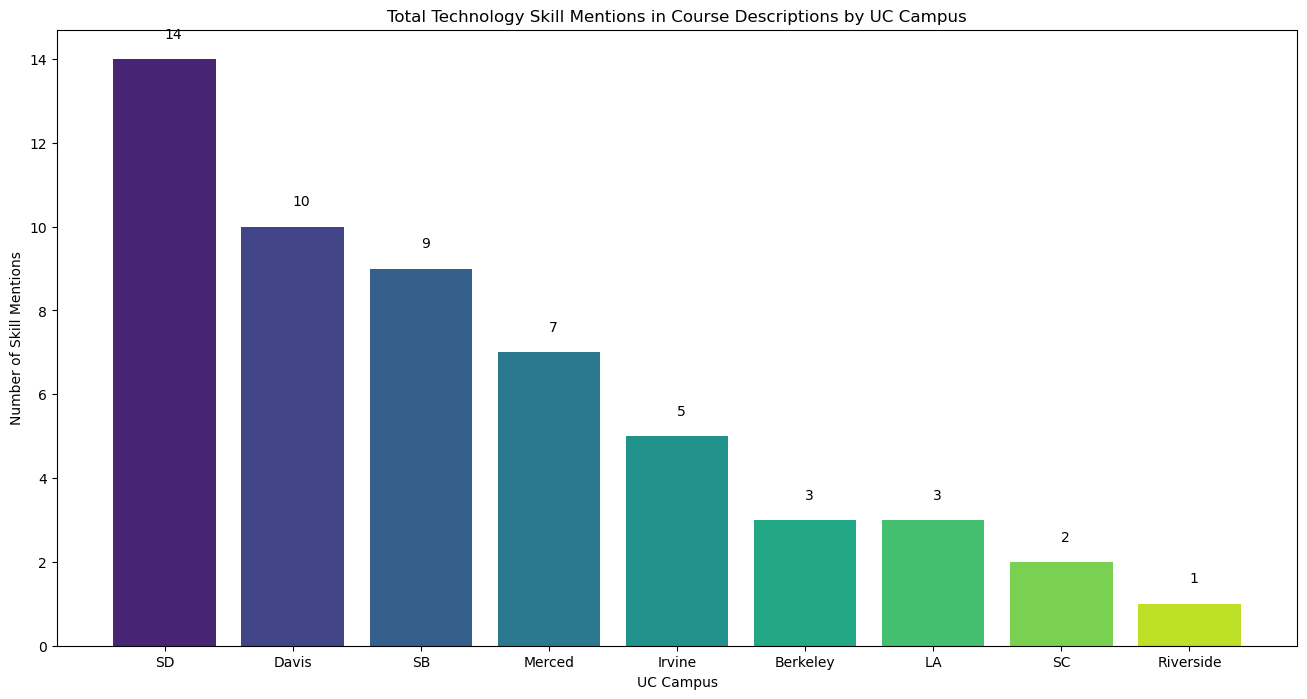

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 8))

corr_sum = corr_sum.sort_values(by='correlation sums', ascending=False)


bars = plt.bar(corr_sum.index, corr_sum['correlation sums'], color=sns.color_palette("viridis", len(corr_sum)))


plt.title('Total Technology Skill Mentions in Course Descriptions by UC Campus')
plt.ylabel('Number of Skill Mentions')
plt.xlabel('UC Campus')


for i, j in enumerate(corr_sum['correlation sums']):
    plt.text(i, j + 0.5, str(j))

    
plt.show()

### Results 
Our results indicate that UC San Diego has the highest number of skill mentions, followed by UC Davis and UC Santa Barbara. On the other hand, UC Riverside has the lowest number of skill mentions, with UC Santa Cruz and UCLA also showing relatively low numbers.

### Interpretation 
These findings suggest that UC San Diego’s curriculum is more aligned with industry-relevant skills compared to other UC campuses, potentially providing students with better preparation for software development careers. However, the significant variation across campuses indicates that some universities may not be as focused on teaching widely used technologies, which could leave graduates less prepared for industry expectations.

### Approach
Next, we examined which specific skills correlated with each university. We visualized this relationship using a heatmap, focusing only on skills that had at least one mention across universities. The heatmap provided a clear representation of skill frequency across different campuses, where darker colors indicate a higher frequency of mentions.

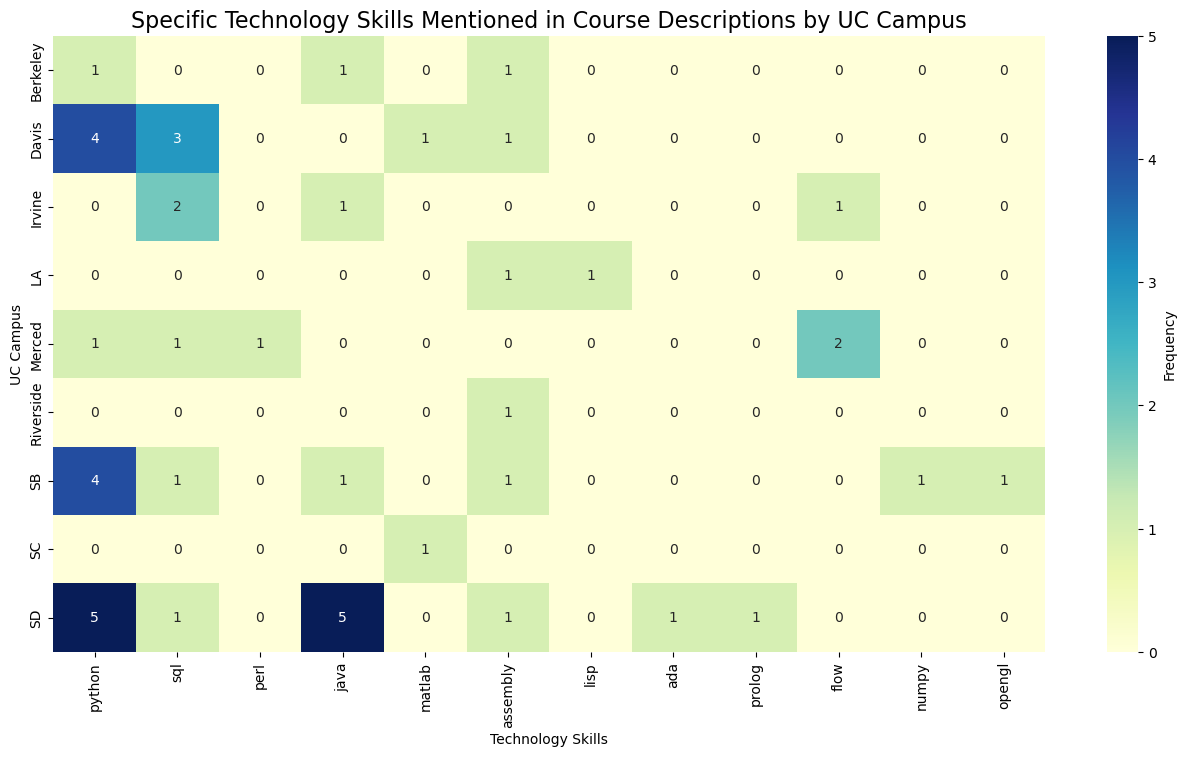

In [58]:
plt.figure(figsize=(16, 8))

non_zero_cols = eda_final.columns[(eda_final.sum() > 0)]

skills_heatmap = eda_final[non_zero_cols]

skills_heatmap = skills_heatmap.loc[:, ~skills_heatmap.columns.duplicated()]

sns.heatmap(skills_heatmap, annot=True, cmap="YlGnBu", cbar_kws={"label": "Frequency"})
plt.title('Specific Technology Skills Mentioned in Course Descriptions by UC Campus', fontsize=16)
plt.ylabel('UC Campus')
plt.xlabel('Technology Skills')
plt.xticks(rotation=90)


plt.show()

### Results
Our findings show that Python and Java were the most frequently mentioned skills across UC curricula, with Python appearing most consistently across multiple campuses. However, other industry-relevant technologies such as lisp, ada, numpy were sparse. Some universities, such as UC San Diego and UC Davis, had stronger correlations with industry-preferred skills, whereas others, notably UC Santa Cruz had minimal mentions of relevant technologies.

### Interpretation
This analysis highlights that while some programming languages align with industry needs, many modern technologies used in professional settings are underrepresented in UC curricula. The significant disparities suggest that while students may gain foundational programming knowledge, they may need additional training in widely used technologies to be fully prepared for industry roles.

### Approach
To compare the programming languages emphasized in industry versus those taught in UC curricula, we utilized side-by-side bar charts. The left chart displays the most frequently used programming languages in industry based on Stack Overflow survey data, while the right chart represents the most mentioned skills in UC course descriptions.

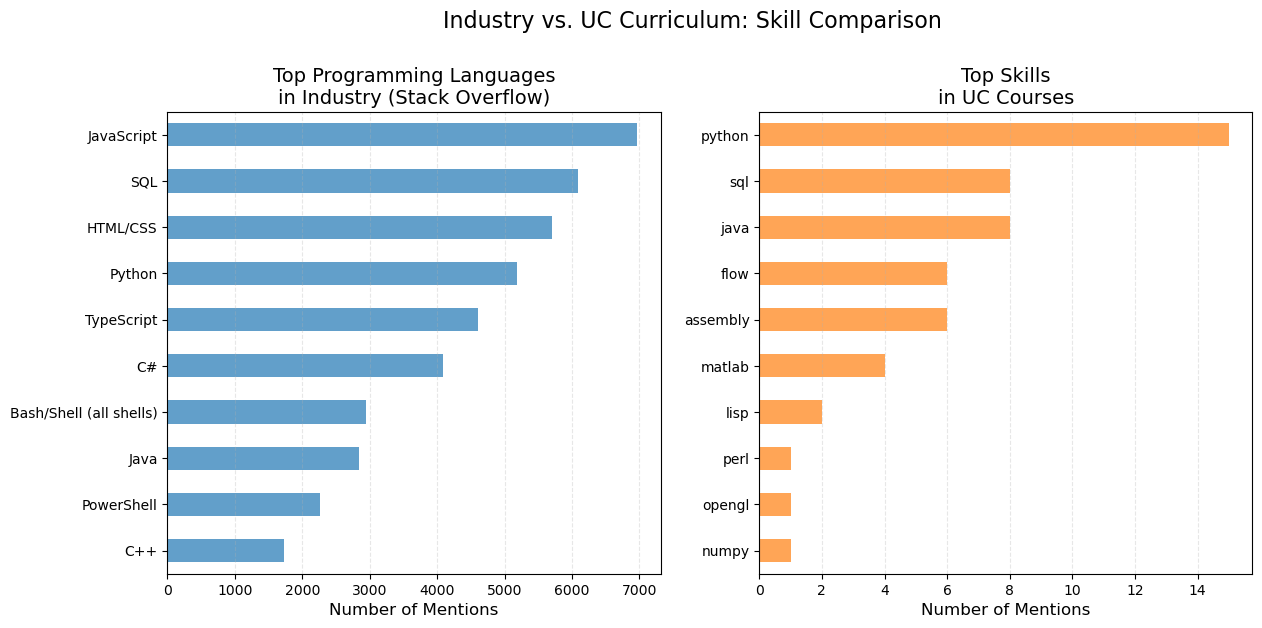

In [59]:
def count_skills(column_name):
    all_skills = stack_df[column_name].dropna().str.split(';').explode()
    return all_skills.value_counts().head(10)

so_languages = count_skills('LanguageHaveWorkedWith')


uc_skills_sum = eda_final.sum()
lowercase_index = pd.Series(uc_skills_sum.values, index=uc_skills_sum.index.str.lower())

uc_skills_deduped = lowercase_index.groupby(level=0).sum()

top_uc_skills = uc_skills_deduped.sort_values(ascending=False).head(10)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

so_languages.plot(kind='barh', ax=ax1, color='#1f77b4', alpha=0.7)
ax1.set_title('Top Programming Languages\nin Industry (Stack Overflow)', fontsize=14)
ax1.set_xlabel('Number of Mentions', fontsize=12)
ax1.set_ylabel('')
ax1.invert_yaxis()  


top_uc_skills_sorted = top_uc_skills.sort_values(ascending=True)
top_uc_skills_sorted.plot(kind='barh', ax=ax2, color='#ff7f0e', alpha=0.7)
ax2.set_title('Top Skills\nin UC Courses', fontsize=14)
ax2.set_xlabel('Number of Mentions', fontsize=12)
ax2.set_ylabel('')

plt.suptitle('Industry vs. UC Curriculum: Skill Comparison', fontsize=16, y=1.05)

for ax in [ax1, ax2]:
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    


plt.show()

### Results
Our analysis revealed a significant discrepancy between industry trends and UC curricula. In industry, JavaScript, HTML/CSS, Python, and SQL are the most commonly used languages. However, UC courses focus heavily on Python, SQL, and Java while placing minimal emphasis on widely used industry technologies like JavaScript, TypeScript, and C#. Additionally, some UC courses include outdated or less commonly used languages such as Lisp, Perl, and OpenGL.

### Interpretation
These findings suggest that UC curricula provide a strong foundation in core programming concepts but may lack sufficient coverage of modern industry-relevant technologies. The absence of JavaScript and web development frameworks, in particular, indicates a gap in preparing students for software engineering roles that require full-stack or front-end development skills. To bridge this gap, universities may need to incorporate more coursework or training opportunities in widely used industry technologies.

### EDA Results 

Our exploratory data analysis (EDA) confirmed our initial prediction that UC San Diego has the strongest correlation with industry-relevant skills compared to other UC campuses. UCSD had the highest number of skill mentions in course descriptions, aligning more closely with technologies reported in the Stack Overflow Developer Survey. This suggests that UCSD's curriculum incorporates more industry-relevant programming languages and tools than other UCs.

However, despite this relative alignment, our overall analysis revealed that there is no strong correlation between UC curricula and the full range of industry-preferred skills. Many of the most in-demand technologies, such as JavaScript, TypeScript, and web frameworks, are underrepresented across all UC campuses. This indicates a gap between academic training and practical industry needs, suggesting that students may need to seek additional learning opportunities beyond their coursework to be fully prepared for software development roles.

# Ethics & Privacy

**Biases in Data Collection & Analysis**
One important limitation in our analysis is that UC course descriptions may not explicitly list all the technologies used in a given class. As a result, some industry-relevant tools may be underrepresented in our findings, leading to potential underestimation of how well certain universities prepare students for the workforce.

Additionally, our main source of industry data comes from the Stack Overflow 2024 Developer Survey, which includes responses from 65,000 developers across 185 countries. However, our analysis is focused on UCs, which primarily serve students in the United States. This discrepancy introduces a potential bias, as developers in other countries may use different technologies than those emphasized in U.S. job markets, leading to an incomplete comparison between university curricula and industry demands.

Another source of bias is the way we aggregated curriculum data across UC campuses. By averaging skill mentions across all campuses, we may obscure differences in program quality and emphasis at individual universities. Additionally, since funding levels vary across UC campuses, universities with more resources may offer a broader range of courses and tools, leading to stronger correlations with industry data.

Lastly, the industry survey includes responses from professionals in a wide range of fields beyond computer science, such as data science, computer engineering, and mathematics. This could introduce bias, as not all reported technologies may be directly relevant to computer science graduates. If possible, filtering for responses from computer science graduates would provide a more precise comparison.

**Ethical Considerations**
A key ethical concern is the potential misrepresentation of a university's ability to prepare students for industry roles. Our analysis relies solely on course descriptions, which may not fully reflect the breadth of learning opportunities available to students. Research opportunities, internships, and elective courses can provide additional industry-relevant skills that are not captured in our dataset. As a result, concluding that a university does not adequately prepare students could negatively impact its reputation and discourage prospective students, even if such a conclusion does not fully capture the academic experience.

Additionally, our analysis does not account for the flexibility students have in choosing electives. Some universities may offer modern technologies as electives rather than core requirements, which would not be reflected in our scraped course descriptions. This could lead to an underestimation of a university’s ability to provide industry-relevant skills.

**Privacy Concerns**
There are no significant privacy concerns in our research, as all datasets used are publicly available. The Stack Overflow Developer Survey is openly accessible, and UC course descriptions are published on university websites. We do not collect or analyze personal or sensitive data, ensuring compliance with ethical research practices.

**Addressing Biases and Ethical Concerns**
To mitigate these biases, we acknowledge the limitations of our dataset and aim to contextualize our findings appropriately. Rather than making definitive claims about the effectiveness of UC curricula, we frame our results as an exploratory analysis highlighting trends and potential gaps. Additionally, we chose to filter our Stack Overflow responses to include only U.S.-based computer science graduates would improve the relevance of our industry dataset. Finally, future studies could analyze course syllabi or student-reported experiences to gain a more comprehensive understanding of industry alignment.

# Discussion and Conclusion

We hypothesized that  UC San Diego's computer science curriculum prepares students for industry needs comparably or more comprehensively than the other UCs.  By analyzing Stack Overflow developer surveys and UC course descriptions, we assessed the alignment between academic training and real-world job market requirements.

Overall, across the UCs, we found a disparity between the skills in curriculum and the technologies used in industry. Stack Overflow survey data reported that JavaScript, HTML/CSS, Python, SQL, and TypeScript are the most widely used languages, while UC curricula focused most on Python, Java, and SQL. Additionally the UC curricula prioritized flow, assembly, lisp, perl, opengl, and numpy which were not present in the Stack Overflow surveys’ top 10 languages, databases, or frameworks. The most aligned skill across both datasets was Python, suggesting it is one of the few areas where academia and industry overlap. We observed a strong theoretical vs. practical disparity in the curricula, compared to the Stack Overflow survey. 
A key discrepancy we observed is the theoretical vs. practical divide in academia. Industry professionals frequently use web frameworks (React, Node.js, jQuery) and databases (PostgreSQL, MySQL, SQLite, MongoDB), which were not commonly covered in UC course descriptions. This suggests that UC curricula may emphasize theoretical learning at the expense of practical application, which could leave graduates underprepared for the hands-on nature of modern software development roles. 
When comparing UCSD to other UC campuses, we found that UCSD’s curriculum contains more industry-relevant skills, ranking highest in total mentions of key technologies. However, even with this advantage, modern tools such as React, Node.js, JavaScript, HTML/CSS and more are still underrepresented. This suggests that while UCSD provides broader exposure to in-demand skills than other UC campuses, graduates may still need to seek additional training to be fully prepared for industry roles.

While our study provides valuable insights, there are several limitations to consider. The Stack Overflow survey is a global dataset, whereas our study focuses on UC graduates in the U.S., which may introduce geographic biases. Additionally, UC course descriptions may not fully capture the extent of practical training provided through research, internships, or independent projects. Future studies could analyze course syllabi rather than just descriptions for a more comprehensive view of academic content.

In conclusion, UCSD provides one of the stronger CS curriculums among UC campuses, but significant gaps still remain across the UCs in modern software development skills. While a solid theoretical foundation is valuable, bridging the gap between academia and industry by integrating hands-on training in web development, databases, and the most commonly used programming languages would better prepare students for the evolving job market. Addressing these gaps will not only benefit students but also strengthen the overall competitiveness of academic institutions in preparing the next generation of software professionals. Ultimately, our research highlights the importance of continuous curriculum updates to reflect the rapidly changing technology landscape. Universities must collaborate with industry professionals to ensure that students graduate with both theoretical knowledge and practical experience. By integrating more industry-aligned skills into academic programs, universities can adequately prepare the next generation of Computer Science students for the competitive workforce.


# Team Contributions

Peter Shamoun 
- Research question, keyBert instantation, background and prior work, webscraping of UCLA, UC Merced, UC Santa Barbara, UC San Diego, UC Riverside, allocation of Stack Overflow data, EDA visualizations.

Viki Shi 
- Webscraping of UC Berkeley and UC Davis, data cleaning, data analysis, ethics and privacy, final submission video and final project notebook creation.

Emily Cai 
- Webscraping of UC Irvine, hypothesis, conclusion and discussion.

Jae Kim
- Project Timeline Proposal and Team Expectations.